In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv(r"C:\Users\Klikan\SkillFactory\Unit_2\project\stud_math.csv")


In [2]:
display(stud.head(10))
stud.info() 

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   
5        yes     yes                 -6.0    yes      yes       no     5.0   
6         no     yes                 -6.0    yes      yes       no     4.0   
7         no     yes                 -6.0    yes       no       no     4.0   
8         no     yes                 -6.0    yes      yes       no     NaN   
9        yes     yes                 -6.0    yes      yes       no     5.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0  
5       4.0    2.0     5.0      10.0   75.0  
6       4.0    4.0     3.0       0.0   55.0  
7       1.0    4.0     1.0       6.0   30.0  
8       2.0    2.0     1.0       0.0   95.0  
9       5.0    1.0     5.0       0.0   75.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
stud.columns
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']
stud.head(10)

school sex  age address famsize pstatus  medu  fedu      mjob     fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime_granular higher internet romantic  famrel  \
0         no     yes                -6.0    yes      NaN       no     4.0   
1         no      no                -6.0    yes      yes       no     5.0   
2         no     yes                -6.0    yes      yes      NaN     4.0   
3        yes     yes                -9.0    yes      yes      yes     3.0   
4         no     yes                -6.0    yes       no       no     4.0   
5        yes     yes                -6.0    yes      yes       no     5.0   
6         no     yes                -6.0    yes      yes       no     4.0   
7         no     yes                -6.0    yes       no       no     4.0   
8         no     yes                -6.0    yes      yes       no     NaN   
9        yes     yes                -6.0    yes      yes       no     5.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0  
5       4.0    2.0     5.0      10.0   75.0  
6       4.0    4.0     3.0       0.0   55.0  
7       1.0    4.0     1.0       6.0   30.0  
8       2.0    2.0     1.0       0.0   95.0  
9       5.0    1.0     5.0       0.0   75.0

school
GP     349
MS      46

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

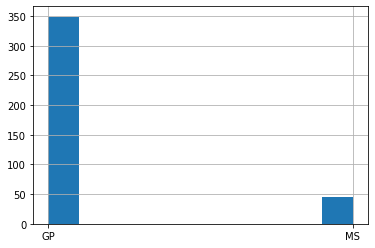

sex
F  208
M  187

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

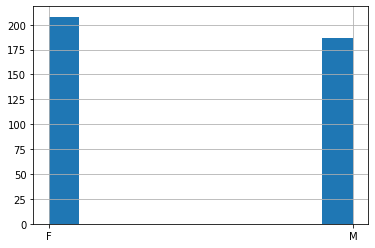

age
16  104
17   98
18   82
15   82
19   24
20    3
22    1
21    1

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

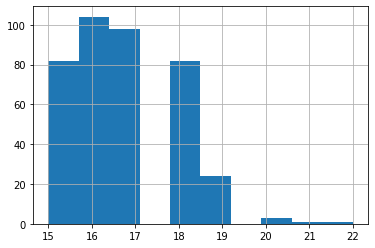

address
U        295
R         83
NaN       17

count     378
unique      2
top         U
freq      295
Name: address, dtype: object

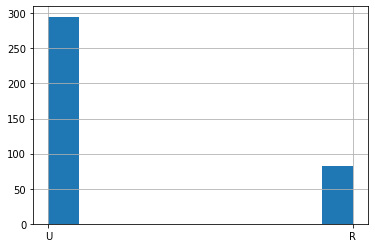

famsize
GT3      261
LE3      107
NaN       27

count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

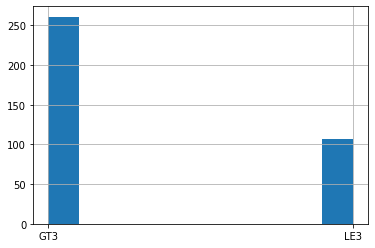

pstatus
T        314
NaN       45
A         36

count     350
unique      2
top         T
freq      314
Name: pstatus, dtype: object

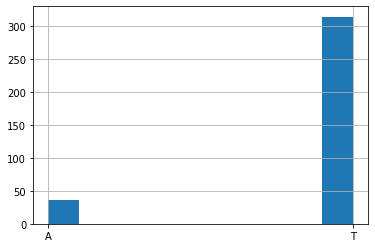

medu
4.0   131
2.0   102
3.0    97
1.0    59
0.0     3
NaN     3

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

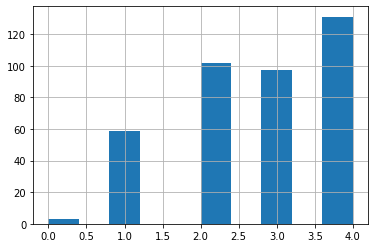

fedu
2.0    106
3.0     96
4.0     88
1.0     78
NaN     24
0.0      2
40.0     1

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

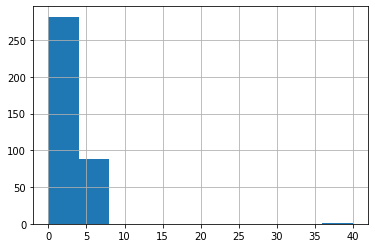

mjob
other      133
services    98
at_home     58
teacher     55
health      32
NaN         19

count       376
unique        5
top       other
freq        133
Name: mjob, dtype: object

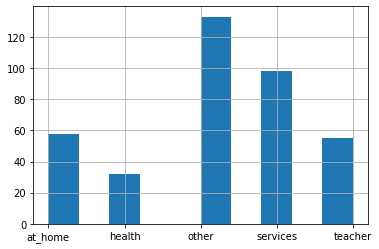

fjob
other      197
services   102
NaN         36
teacher     29
at_home     16
health      15

count       359
unique        5
top       other
freq        197
Name: fjob, dtype: object

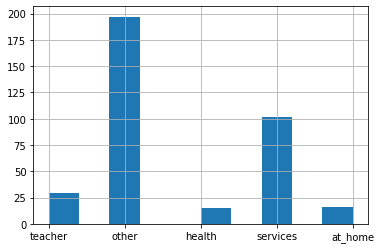

reason
course         137
home           104
reputation     103
other           34
NaN             17

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

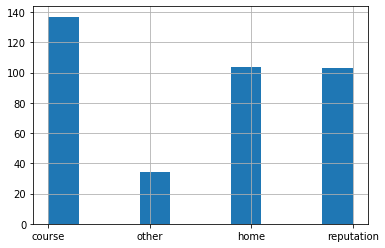

guardian
mother       250
father        86
NaN           31
other         28

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

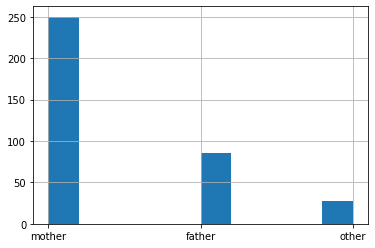

traveltime
1.0         242
2.0          96
NaN          28
3.0          22
4.0           7

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

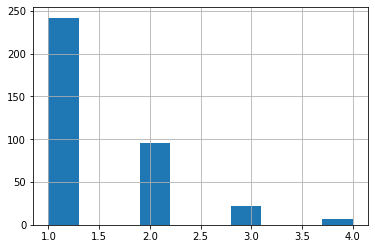

studytime
2.0        194
1.0        103
3.0         64
4.0         27
NaN          7

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

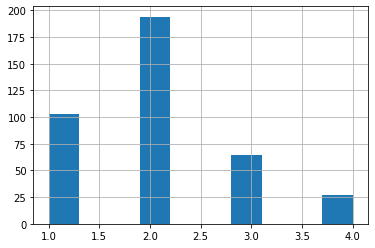

failures
0.0       293
1.0        49
NaN        22
2.0        16
3.0        15

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

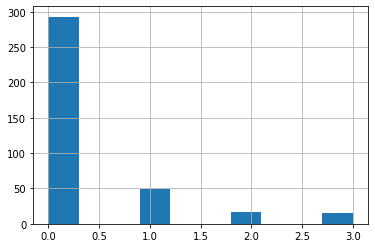

schoolsup
no         335
yes         51
NaN          9

count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

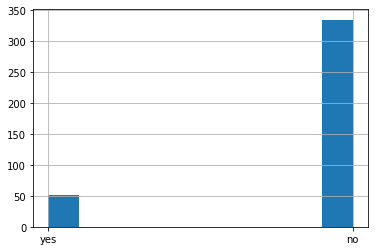

famsup
yes     219
no      137
NaN      39

count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

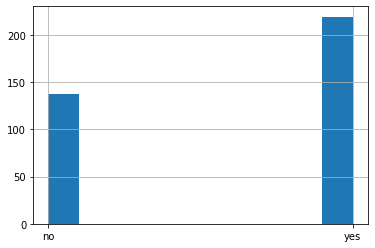

paid
no    200
yes   155
NaN    40

count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

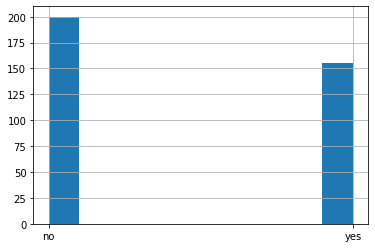

activities
yes         195
no          186
NaN          14

count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

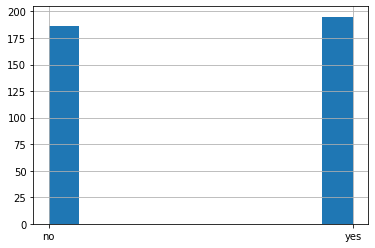

nursery
yes      300
no        79
NaN       16

count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

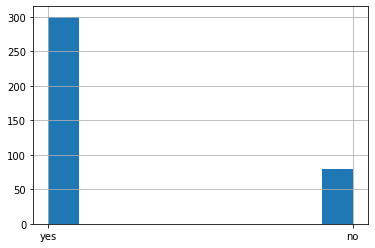

studytime_granular
-6.0                  194
-3.0                  103
-9.0                   64
-12.0                  27
 NaN                    7

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

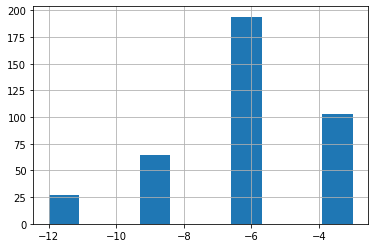

higher
yes     356
NaN      20
no       19

count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

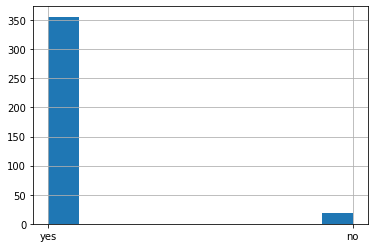

internet
yes       305
no         56
NaN        34

count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

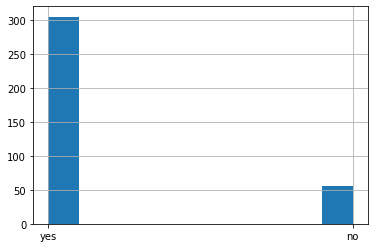

romantic
no        240
yes       124
NaN        31

count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object

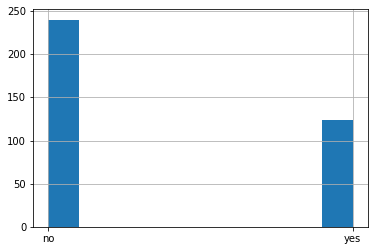

famrel
 4.0     182
 5.0      99
 3.0      62
 NaN      27
 2.0      17
 1.0       7
-1.0       1

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

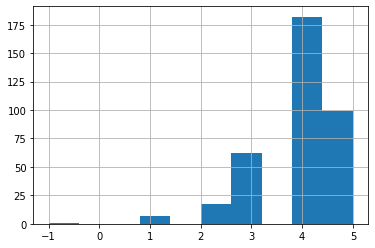

freetime
3.0       153
4.0       112
2.0        63
5.0        38
1.0        18
NaN        11

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

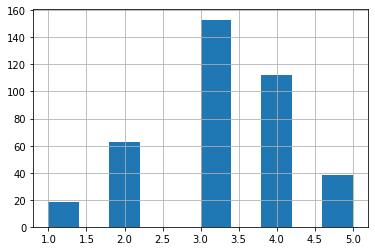

goout
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
NaN      8

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

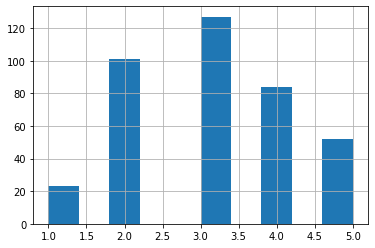

health
5.0     138
3.0      89
4.0      63
1.0      47
2.0      43
NaN      15

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

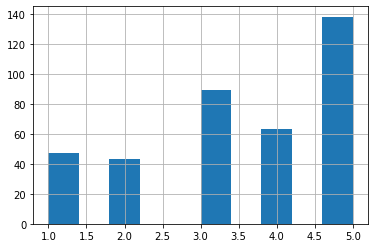

absences
0.0         111
2.0          60
4.0          53
6.0          31
8.0          21
10.0         17
12.0         12
NaN          12
14.0         12
3.0           8
16.0          7
7.0           6
5.0           5
18.0          5
20.0          4
1.0           3
22.0          3
9.0           3
13.0          2
15.0          2
11.0          2
25.0          1
54.0          1
385.0         1
26.0          1
56.0          1
24.0          1
212.0         1
21.0          1
75.0          1
30.0          1
19.0          1
38.0          1
40.0          1
23.0          1
17.0          1
28.0          1

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

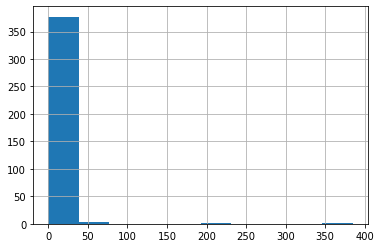

score
50.0      54
55.0      46
0.0       37
75.0      33
65.0      31
40.0      31
60.0      31
45.0      27
70.0      27
80.0      16
30.0      15
90.0      12
35.0       9
25.0       7
NaN        6
85.0       6
95.0       5
100.0      1
20.0       1

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

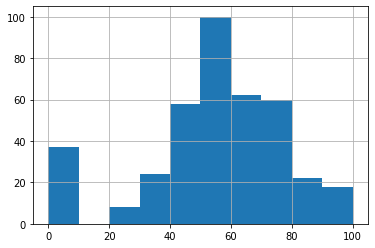

In [4]:
### Первичная обработка данных.
def value (column):
    df = pd.DataFrame(column.value_counts(dropna = False, normalize = False))
    return df
for item in stud.columns:
    stud[item] = stud[item].apply(lambda x: None if pd.isna(x) else x)
    display(value(stud[item]))
    stud[item].hist()
    display(stud[item].describe())
    plt.show()
     


In [5]:
### Устраним выбросы
##  Устраним выбросы числовых переменных (опираясь на здравый смысл)
# Образование отца
stud = stud[stud.fedu < 40]
# Семейные отношения
stud = stud[stud.famrel > 0]

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


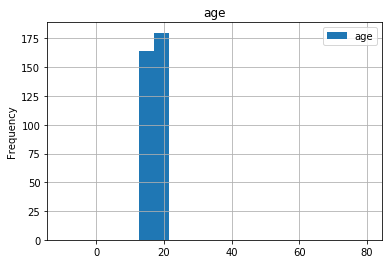

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


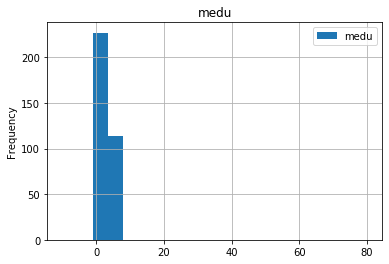

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


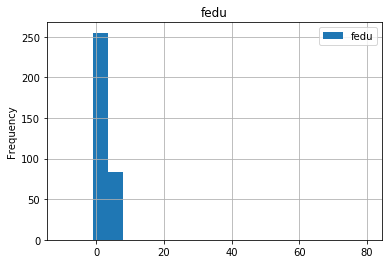

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


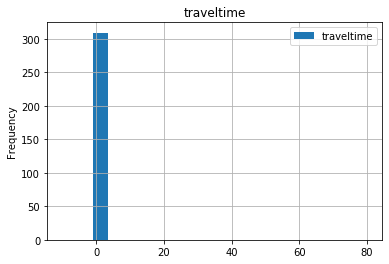

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


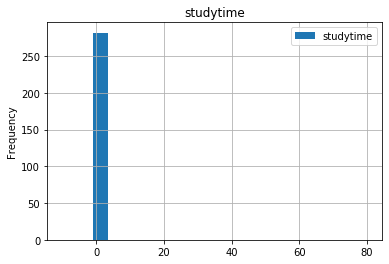

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


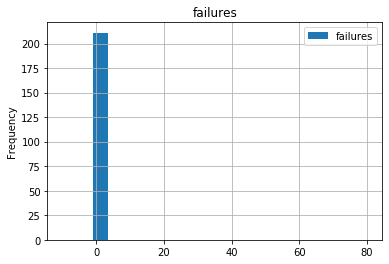

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


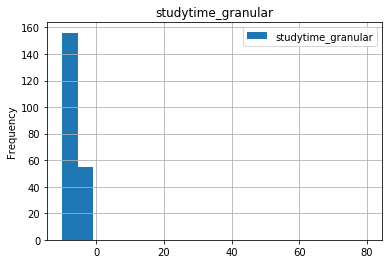

25-й перцентиль: 4.0, 75-й перцентиль: 4.5, IQR: 0.5,  Границы выбросов: [3.25, 5.25].


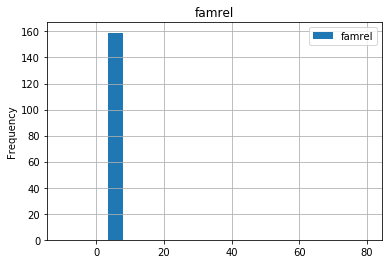

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


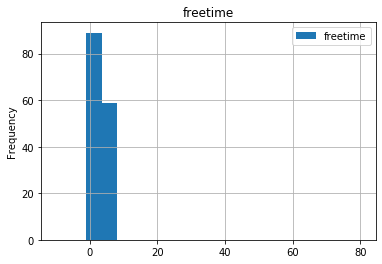

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


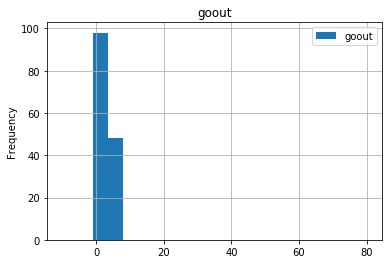

25-й перцентиль: 2.0, 75-й перцентиль: 5.0, IQR: 3.0,  Границы выбросов: [-2.5, 9.5].


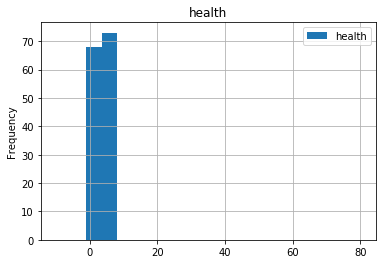

25-й перцентиль: 0.0, 75-й перцентиль: 6.0, IQR: 6.0,  Границы выбросов: [-9.0, 15.0].


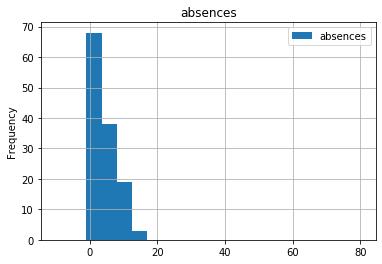

25-й перцентиль: 50.0, 75-й перцентиль: 70.0, IQR: 20.0,  Границы выбросов: [20.0, 100.0].


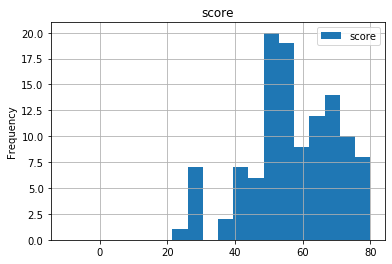

In [6]:
## Устраним выбросы числовых переменных (формулой интерквартильного расстояния)
# Зададим функцию для обработки числовых колонок

def data_spike (column):
    global IQR, perc25, perc75
    median = stud[column].median()
    IQR = stud[column].quantile(0.75) - stud[column].quantile(0.25)
    perc25 = stud[column].quantile(0.25)
    perc75 = stud[column].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    stud[column].loc[stud[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].plot(kind='hist', grid=True, 
                                                                                    title=column, bins = 20, 
                                                                                    range = (-10, 80))
    plt.legend()   

##################################################################################################################################
# Обращение к функции (data_spike)
for column in stud.select_dtypes(include = ['float64', 'int64']).columns:
  data_spike(column)
  plt.show()
  stud = stud.loc[stud[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

  



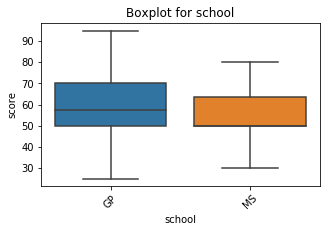

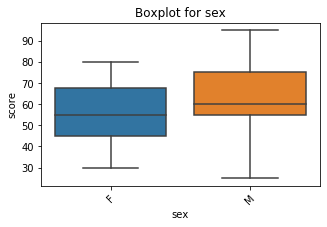

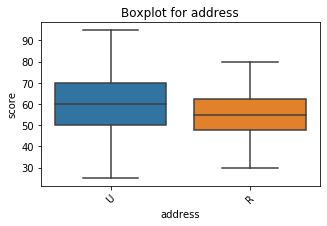

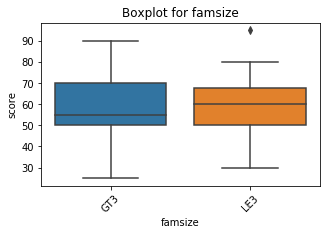

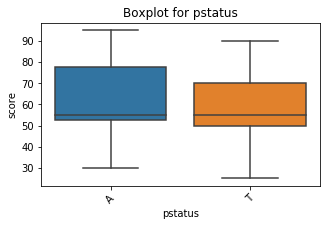

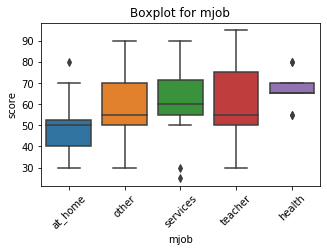

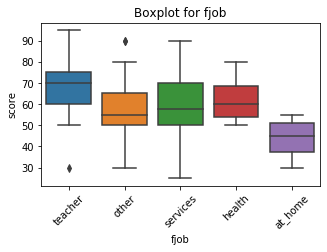

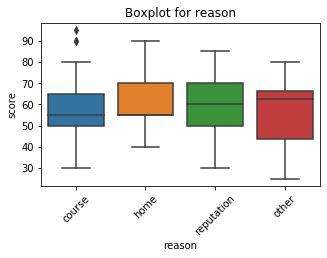

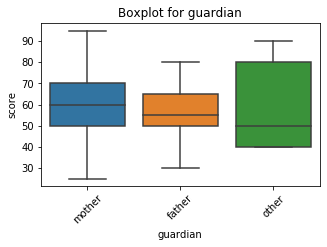

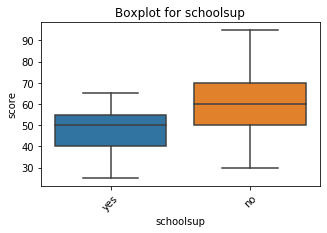

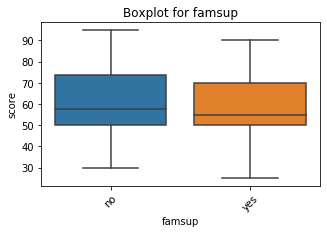

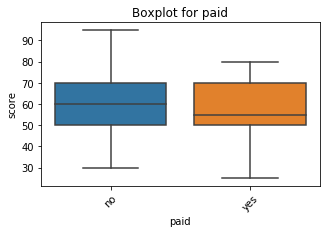

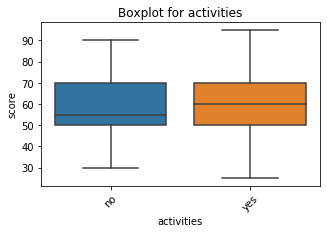

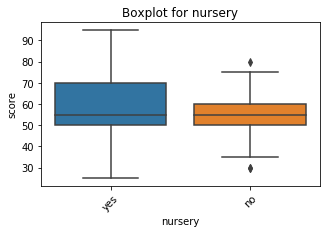

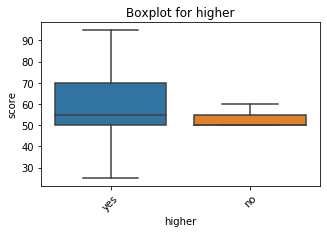

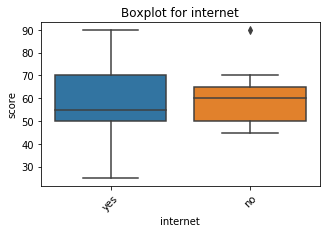

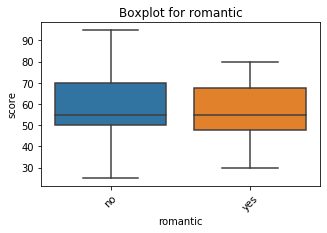

In [7]:
### Анализ номинативных переменных

## Зададим функцию для отображения графиков плотности распределения переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (5, 3))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
######################################################################################################

# Обращение к функции (data_spik)
for column in stud.select_dtypes(include = ['object']).columns:
    get_boxplot(column)
    plt.show()

In [8]:
## Проверим статистическую разницу в распределении оценок с помощью теста Стьюдента
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for column in stud.select_dtypes(include = ['object']).columns:
    get_stat_dif(column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки schoolsup


In [9]:
## Для дальнейшего посторения модели используем переменные: sex, mjob, schoolsup.
## Из анализа можно сделать вывод, что ученикам мужского пола изучение математики дается легче, чем ученикам жеского пола.

In [10]:
### Корреляционный анализ количественных переменных
stud.corr()


age      medu      fedu  traveltime  studytime  \
age                 1.000000 -0.043281 -0.100141    0.189335   0.007304   
medu               -0.043281  1.000000  0.620653   -0.055629   0.060845   
fedu               -0.100141  0.620653  1.000000   -0.042178  -0.046599   
traveltime          0.189335 -0.055629 -0.042178    1.000000  -0.143967   
studytime           0.007304  0.060845 -0.046599   -0.143967   1.000000   
failures                 NaN       NaN       NaN         NaN        NaN   
studytime_granular -0.007304 -0.060845  0.046599    0.143967  -1.000000   
famrel             -0.084521  0.062025  0.034835   -0.107624   0.029726   
freetime           -0.080471  0.065110  0.041139    0.073435  -0.031205   
goout               0.111146  0.008407 -0.043158   -0.063820   0.013850   
health             -0.034241 -0.058203  0.041265   -0.005000  -0.061220   
absences            0.210241  0.123055  0.065537   -0.044366  -0.033633   
score              -0.123756  0.126962  0.077740   -0.021659   0.005128   

                    failures  studytime_granular        famrel      freetime  \
age                      NaN           -0.007304 -8.452114e-02 -8.047077e-02   
medu                     NaN           -0.060845  6.202532e-02  6.510970e-02   
fedu                     NaN            0.046599  3.483533e-02  4.113856e-02   
traveltime               NaN            0.143967 -1.076244e-01  7.343461e-02   
studytime                NaN           -1.000000  2.972629e-02 -3.120451e-02   
failures                 NaN                 NaN           NaN           NaN   
studytime_granular       NaN            1.000000 -2.972629e-02  3.120451e-02   
famrel                   NaN           -0.029726  1.000000e+00 -9.323455e-17   
freetime                 NaN            0.031205 -9.323455e-17  1.000000e+00   
goout                    NaN           -0.013850 -7.624108e-02  9.670579e-02   
health                   NaN            0.061220 -1.548463e-02  6.583130e-02   
absences                 NaN            0.033633 -4.151504e-02 -2.209664e-02   
score                    NaN           -0.005128  2.357432e-01  2.942433e-02   

                       goout    health  absences     score  
age                 0.111146 -0.034241  0.210241 -0.123756  
medu                0.008407 -0.058203  0.123055  0.126962  
fedu               -0.043158  0.041265  0.065537  0.077740  
traveltime         -0.063820 -0.005000 -0.044366 -0.021659  
studytime           0.013850 -0.061220 -0.033633  0.005128  
failures                 NaN       NaN       NaN       NaN  
studytime_granular -0.013850  0.061220  0.033633 -0.005128  
famrel             -0.076241 -0.015485 -0.041515  0.235743  
freetime            0.096706  0.065831 -0.022097  0.029424  
goout               1.000000 -0.063750  0.224904 -0.271061  
health             -0.063750  1.000000 -0.061686  0.102968  
absences            0.224904 -0.061686  1.000000 -0.203639  
score              -0.271061  0.102968 -0.203639  1.000000

In [11]:
## Отрицательная корреляция переменной age говорит о том, что с увеличением возраста средний балл уменшьшается.
## Из анализа ткаже можно сделать выводы о влиянии переменных fedu и medu (образование родителей), на средний балл.
## Самое большое влияние на средний балл оказывают: famrel, goout, health и absences.


In [12]:
### Вывод: Модель для предсказания результатов госэкзамена по математике должна включать следующие параметры: sex, mjob, schoolsup, fedu, medu, famrel, goout, health, absences.
stud = stud[['sex', 'mjob', 'schoolsup', 'fedu', 'medu', 'famrel', 'goout', 'health', 'absences', 'score']]
stud

sex      mjob schoolsup  fedu  medu  famrel  goout  health  absences  \
0     F   at_home       yes   4.0   4.0     4.0    4.0     3.0       6.0   
1     F   at_home        no   1.0   1.0     5.0    3.0     3.0       4.0   
4     F     other        no   3.0   3.0     4.0    2.0     5.0       4.0   
5     M  services        no   3.0   4.0     5.0    2.0     5.0      10.0   
6     M     other        no   2.0   2.0     4.0    4.0     3.0       0.0   
..   ..       ...       ...   ...   ...     ...    ...     ...       ...   
381   M     other        no   1.0   2.0     4.0    3.0     5.0       5.0   
382   M     other        no   3.0   2.0     4.0    3.0     3.0       2.0   
386   F   teacher        no   4.0   4.0     4.0    3.0     5.0       7.0   
388   F   teacher        no   1.0   3.0     4.0    4.0     1.0       0.0   
393   M  services        no   2.0   3.0     4.0    1.0     5.0       0.0   

     score  
0     30.0  
1     30.0  
4     50.0  
5     75.0  
6     55.0  
..     ...  
381   35.0  
382   50.0  
386   30.0  
388   40.0  
393   50.0  

[120 rows x 10 columns]